In [18]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import sklearn
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model.coordinate_descent import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor

In [19]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False
## 拦截异常
warnings.filterwarnings(action = 'ignore', category=ConvergenceWarning)

In [20]:
def notEmpty(s):
    return s != ''

In [21]:
# ## 加载数据
# names = ['CRIM','ZN', 'INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
# path = "./boston_housing.data"
# ## 由于数据文件格式不统一，所以读取的时候，先按照一行一个字段属性读取数据，然后再安装每行数据进行处理
# fd = pd.read_csv(path,header=None)

In [22]:
## 加载数据
names = ['CRIM','ZN', 'INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
path = "./boston_housing.data"
## 由于数据文件格式不统一，所以读取的时候，先按照一行一个字段属性读取数据，然后再安装每行数据进行处理
fd = pd.read_csv(path,header=None)
# print (fd.shape)
data = np.empty((len(fd), 14))
for i, d in enumerate(fd.values):#enumerate生成一列索 引i,d为其元素

    d = map(float, filter(notEmpty, d[0].split(' ')))#filter一个函数，一个list
    
    #根据函数结果是否为真，来过滤list中的项。
    data[i] = list(d)
    
## 分割数据
x, y = np.split(data, (13,), axis=1)
# print (x[0:5])
y = y.ravel() # 转换格式 拉直操作

In [23]:
# 数据分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#标准化
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)



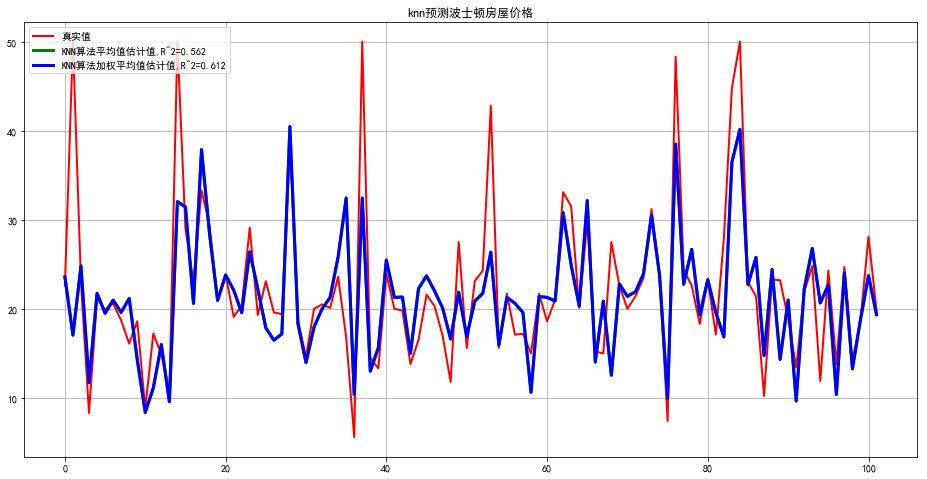

In [32]:
plt.figure(figsize=(16,8), facecolor='w')
ln_x_test = range(len(x_test))
colors = ['g-', 'b-']

plt.plot(ln_x_test, y_test, 'r-', lw=2, label=u'真实值')

#平均knn
uni_knr=KNeighborsRegressor(n_neighbors=5,weights='uniform')
uni_knr.fit(x_train,y_train)
uni_knr_y_predict=uni_knr.predict(x_test)

#加权平均knn
dis_knr=KNeighborsRegressor(n_neighbors=5,weights='distance')
dis_knr.fit(x_train,y_train)
dis_knr_y_predict=uni_knr.predict(x_test)

plt.plot(ln_x_test, uni_knr_y_predict, colors[0], lw = 3, label=u'KNN算法平均值估计值,R^2=%.3f' % uni_knr.score(x_test,y_test))
plt.plot(ln_x_test, dis_knr_y_predict, colors[1], lw =3, label=u'KNN算法加权平均值估计值,R^2=%.3f' % dis_knr.score(x_test,y_test))

# 图形显示
plt.legend(loc = 'upper left')
plt.grid(True)
plt.title(u"knn预测波士顿房屋价格")
plt.show()